In [2]:
#importing
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import cv2

Using TensorFlow backend.


In [3]:
#Resizing the training, mask and testing images
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = 'data/train/'
mask_path='data/binary/'
train_id=[]
test_id=[]
mask_id=[]
TEST_PATH = 'data/test/'
for i in range(199):
    train_ids=os.walk(TRAIN_PATH)
    train_id.append(train_ids)
    

lentrain=i+1

for k in range(199):
    mask_ids=os.walk(mask_path)
    mask_id.append(mask_ids)

lenmask=k+1
for j in range(51):
    test_ids=os.walk(TEST_PATH)
    test_id.append(test_ids)
lentest=j+1

X_train = np.zeros((lentrain, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((lenmask, IMG_HEIGHT, IMG_WIDTH), dtype=bool)


for n, id_ in tqdm(enumerate(train_id), total=lentrain):
    path = TRAIN_PATH 
    img = imread(path + str(n) + '.bmp')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=bool)
for n, id_ in tqdm(enumerate(mask_id), total=lenmask):
    path = mask_path 
    img = cv2.imread(path + str(n) + '.png',0)
    print(img.shape)
    mask = resize(img, (IMG_HEIGHT, IMG_WIDTH),mode='constant', preserve_range=True)
    print(mask.shape)
    
    Y_train[n] = mask 
 
        
    
X_test = np.zeros((lentest+1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
    
for n, id_ in tqdm(enumerate(test_id), total=lentest):
    path1 = TEST_PATH 
    img1 = imread(path1 + str(n) + '.bmp')[:,:,:IMG_CHANNELS]
    img2 = resize(img1, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img2

  2%|█▏                                                                                | 3/199 [00:00<00:54,  3.62it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

  3%|██▍                                                                               | 6/199 [00:00<00:39,  4.88it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


  5%|████                                                                             | 10/199 [00:00<00:27,  6.98it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

  8%|██████                                                                           | 15/199 [00:01<00:17, 10.52it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

  9%|██████▉                                                                          | 17/199 [00:01<00:15, 12.08it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 11%|████████▉                                                                        | 22/199 [00:01<00:11, 15.34it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 13%|██████████▏                                                                      | 25/199 [00:01<00:10, 16.49it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 14%|███████████▍                                                                     | 28/199 [00:01<00:09, 17.92it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 17%|█████████████▊                                                                   | 34/199 [00:02<00:08, 18.66it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 18%|██████████████▋                                                                  | 36/199 [00:02<00:09, 17.71it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 21%|████████████████▋                                                                | 41/199 [00:02<00:08, 18.46it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 22%|█████████████████▉                                                               | 44/199 [00:02<00:08, 18.97it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 24%|███████████████████▏                                                             | 47/199 [00:02<00:07, 19.87it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 27%|█████████████████████▌                                                           | 53/199 [00:03<00:07, 19.79it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 28%|██████████████████████▊                                                          | 56/199 [00:03<00:07, 19.93it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 31%|█████████████████████████▏                                                       | 62/199 [00:03<00:06, 21.84it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 33%|██████████████████████████▍                                                      | 65/199 [00:03<00:06, 21.40it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 34%|███████████████████████████▋                                                     | 68/199 [00:03<00:06, 21.76it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 36%|████████████████████████████▉                                                    | 71/199 [00:03<00:05, 21.34it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 38%|██████████████████████████████▌                                                  | 75/199 [00:04<00:06, 19.05it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)


 40%|████████████████████████████████▏                                                | 79/199 [00:04<00:07, 16.06it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 41%|█████████████████████████████████▍                                               | 82/199 [00:04<00:06, 18.27it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 46%|█████████████████████████████████████                                            | 91/199 [00:04<00:04, 25.09it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 49%|███████████████████████████████████████▍                                         | 97/199 [00:04<00:03, 29.20it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 51%|████████████████████████████████████████▌                                       | 101/199 [00:05<00:03, 26.57it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 53%|██████████████████████████████████████████▏                                     | 105/199 [00:05<00:04, 21.35it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 54%|███████████████████████████████████████████▍                                    | 108/199 [00:05<00:04, 21.45it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 56%|████████████████████████████████████████████▌                                   | 111/199 [00:05<00:05, 17.39it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 57%|█████████████████████████████████████████████▊                                  | 114/199 [00:06<00:05, 15.62it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 58%|██████████████████████████████████████████████▋                                 | 116/199 [00:06<00:05, 15.01it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)

 60%|████████████████████████████████████████████████▏                               | 120/199 [00:06<00:05, 14.73it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 62%|█████████████████████████████████████████████████▊                              | 124/199 [00:06<00:04, 16.46it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 64%|███████████████████████████████████████████████████                             | 127/199 [00:06<00:04, 17.98it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 67%|█████████████████████████████████████████████████████▍                          | 133/199 [00:07<00:03, 20.99it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 68%|██████████████████████████████████████████████████████▋                         | 136/199 [00:07<00:03, 20.57it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 70%|███████████████████████████████████████████████████████▉                        | 139/199 [00:07<00:02, 21.70it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 73%|██████████████████████████████████████████████████████████▎                     | 145/199 [00:07<00:02, 22.48it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 74%|███████████████████████████████████████████████████████████▍                    | 148/199 [00:07<00:02, 22.62it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 77%|█████████████████████████████████████████████████████████████▉                  | 154/199 [00:07<00:02, 21.00it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 79%|███████████████████████████████████████████████████████████████                 | 157/199 [00:08<00:01, 21.74it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 80%|████████████████████████████████████████████████████████████████▎               | 160/199 [00:08<00:01, 21.90it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 83%|██████████████████████████████████████████████████████████████████▋             | 166/199 [00:08<00:01, 21.85it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 85%|███████████████████████████████████████████████████████████████████▉            | 169/199 [00:08<00:01, 21.33it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 88%|██████████████████████████████████████████████████████████████████████▎         | 175/199 [00:08<00:01, 21.05it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 89%|███████████████████████████████████████████████████████████████████████▌        | 178/199 [00:09<00:01, 20.98it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 91%|████████████████████████████████████████████████████████████████████████▊       | 181/199 [00:09<00:00, 20.65it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 92%|█████████████████████████████████████████████████████████████████████████▉      | 184/199 [00:09<00:00, 20.61it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 95%|████████████████████████████████████████████████████████████████████████████▍   | 190/199 [00:09<00:00, 20.18it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 97%|█████████████████████████████████████████████████████████████████████████████▌  | 193/199 [00:09<00:00, 20.88it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:08<00:00,  6.27it/s]


3


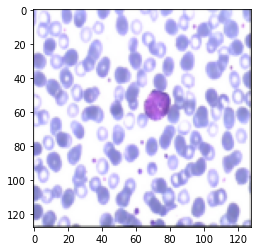

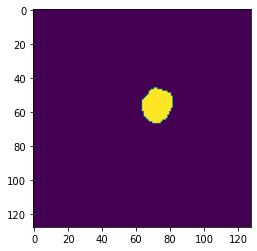

21


In [4]:
#Displaying a random image from the array X_train(training set), Y_train(mask) and X_test(test set)
image_x = random.randint(0, lentrain)
print(image_x)
res=X_train[image_x]
plt.imshow(res)
plt.show()
res1=Y_train[image_x]
plt.imshow(np.squeeze(res1))
plt.show()
image_x2= random.randint(0, lentest)
print(image_x2)


In [ ]:
#UNET model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint('model', verbose=1, save_best_only=True)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)

def mean_iou(y_pred, y_true):
    I = tf.reduce_sum(y_pred * y_true, axis=(1, 2))
    U = tf.reduce_sum(y_pred + y_true, axis=(1, 2)) - I
    mean_iou=tf.reduce_mean(I / U)
    return mean_iou
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16,epochs=5, callbacks=[earlystopper, checkpointer])


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

 80/179 [============>.................] - ETA: 11s - loss: 0.3966 - mean_iou: 0.0147

179/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

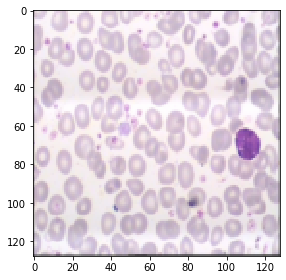

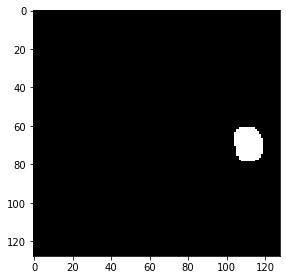

C:\Users\HP\Anaconda3\envs\pytorch_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


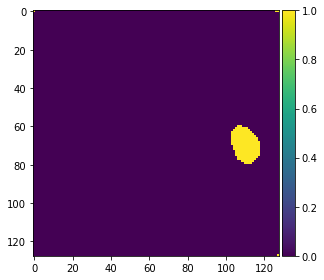

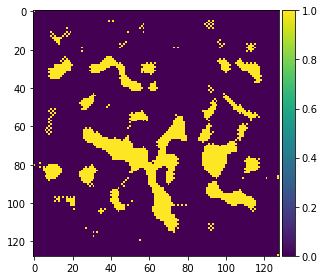

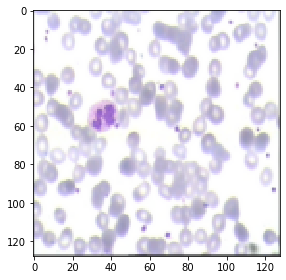

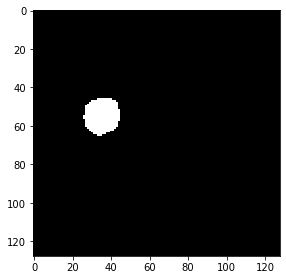

In [9]:
import random

import seaborn as sns
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_val1 = model.predict(X_train[int(Y_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train>0.05).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.05).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = 10
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()


imshow(np.squeeze(preds_train_t[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()
# Perform a sanity check on some random validation samples
ix = 2
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()




20


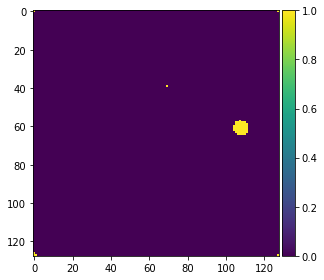

21


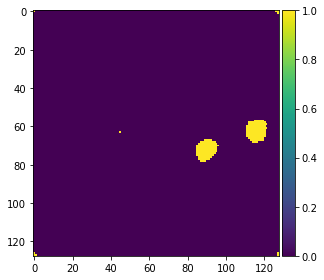

22


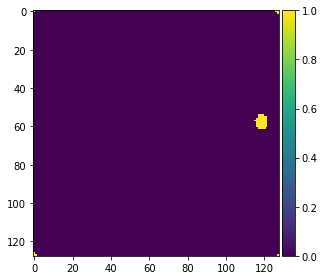

23


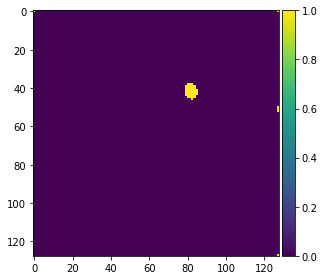

In [16]:
import imageio
preds_test_t = (preds_test > 0.03).astype(np.uint8)
path='data/segment/'
for i in range(51):
    print(i)
    res=np.squeeze(preds_test_t[i])
    imshow(res)
    plt.show()
    segment=res.reshape((128,128))
    plt.imsave(path+str(i)+'(1).png',segment)